## Importing all the necessary libraries


In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

## Reading the CSV files as a DataFrame

In [3]:
al_si = pd.read_csv('/content/drive/MyDrive/GSOC22/ML4SCI/Messenger/Mercury/alsimap_smooth_032015.png.csv',header=None)

In [4]:
ca_si = pd.read_csv('/content/drive/MyDrive/GSOC22/ML4SCI/Messenger/Mercury/casimap_smooth_032015.png.csv',header=None)

In [5]:
fe_si = pd.read_csv('/content/drive/MyDrive/GSOC22/ML4SCI/Messenger/Mercury/fesimap_smooth_032015.png.csv',header=None)

In [6]:
bottom = pd.read_csv('/content/drive/MyDrive/GSOC22/ML4SCI/Messenger/Mercury/mercury-albedo-resized-bottom-half.png.csv',header=None)

In [7]:
top = pd.read_csv('/content/drive/MyDrive/GSOC22/ML4SCI/Messenger/Mercury/mercury-albedo-top-half.png.csv',header=None)

In [8]:
mg_si = pd.read_csv('/content/drive/MyDrive/GSOC22/ML4SCI/Messenger/Mercury/mgsimap_smooth_032015.png.csv',header=None)

In [9]:
s_si = pd.read_csv('/content/drive/MyDrive/GSOC22/ML4SCI/Messenger/Mercury/ssimap_smooth_032015.png.csv',header=None)

In [11]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

## We now define a function to convert the 720x1440 matrix to to column vector. This is done to find relationship between pixel values of top half of albedo with the top half of chemical composition images. 
**bold text**

In [14]:
def reshape(dataFrame):
  data = dataFrame.values.reshape(-1,1)

  return data



In [15]:
Xtrain = reshape(top)

In [19]:
Xtest = reshape(bottom)

## We apply simple Linear Regression model to predict the brigtness of each pixel using the pixel values of bottom half of the albedo

In [23]:
def LinearRegressionModel(chemicalData,model):
  yTrain = reshape(chemicalData)
  model.fit(Xtrain,yTrain)
  yPrediction = model.predict(Xtest)
  yImage = yPrediction.reshape(720,1440)

  return yPrediction , yImage



In [24]:
lr = LinearRegression()

In [31]:
al_si_lr_prediction , al_si_lr_bottom = LinearRegressionModel(al_si,lr)

In [32]:
ca_si_lr_prediction , ca_si_lr_bottom = LinearRegressionModel(ca_si,lr)

In [33]:
fe_si_lr_prediction , fe_si_lr_bottom = LinearRegressionModel(fe_si,lr)

In [34]:
mg_si_lr_prediction , mg_si_lr_bottom = LinearRegressionModel(mg_si,lr)

In [35]:
s_si_lr_prediction , s_si_lr_bottom = LinearRegressionModel(s_si,lr)

## We now plot the predicted images of each chemical composition and the bottom half of the albedo

Text(0.5, 1.0, 'Albedo Mercury bottom half')

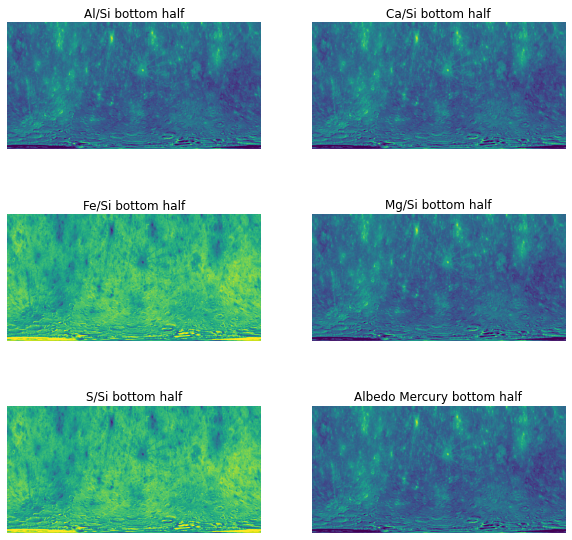

In [44]:
fig = plt.figure(figsize=(10,10))
rows = 3
columns = 2
  

Image1 = al_si_lr_bottom
Image2 = ca_si_lr_bottom
Image3 = fe_si_lr_bottom
Image4 = mg_si_lr_bottom
Image5 = s_si_lr_bottom
Image6 = bottom
  

fig.add_subplot(rows, columns, 1)

plt.imshow(Image1)
plt.axis('off')
plt.title("Al/Si bottom half")
  

fig.add_subplot(rows, columns, 2)
  

plt.imshow(Image2)
plt.axis('off')
plt.title("Ca/Si bottom half")
  

fig.add_subplot(rows, columns, 3)
  

plt.imshow(Image3)
plt.axis('off')
plt.title("Fe/Si bottom half")
  

fig.add_subplot(rows, columns, 4)
  

plt.imshow(Image4)
plt.axis('off')
plt.title("Mg/Si bottom half")

fig.add_subplot(rows, columns, 5)
  

plt.imshow(Image5)
plt.axis('off')
plt.title("S/Si bottom half")

fig.add_subplot(rows, columns, 6)
  

plt.imshow(Image6)
plt.axis('off')
plt.title("Albedo Mercury bottom half")



## A function is defined to predict brightness of each pixel of chemical composition using XG Boost model and then reshaped to construct the bottom half for each prediction

In [36]:
def XGBModel(chemicalData,model):
  yTrain = reshape(chemicalData)
  model.fit(Xtrain,yTrain)
  yPrediction = model.predict(Xtest)
  yImage = yPrediction.reshape(720,1440)

  return yPrediction , yImage

In [37]:
xgb =  XGBRegressor()

In [38]:
al_si_xgb_prediction , al_si_xgb_bottom = XGBModel(al_si,xgb)

[12:28:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [39]:
ca_si_xgb_prediction , ca_si_xgb_bottom = XGBModel(ca_si,xgb)

[12:29:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [40]:
fe_si_xgb_prediction , fe_si_xgb_bottom = XGBModel(fe_si,xgb)

[12:30:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [42]:
mg_si_xgb_prediction , mg_si_xgb_bottom = XGBModel(mg_si,xgb)

[12:48:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [43]:
s_si_xgb_prediction , s_si_xgb_bottom = XGBModel(s_si,xgb)

[12:49:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## We now plot the predicted images for each chemical compostion using the bottom half of the albedo

Text(0.5, 1.0, 'Albedo Mercury bottom half')

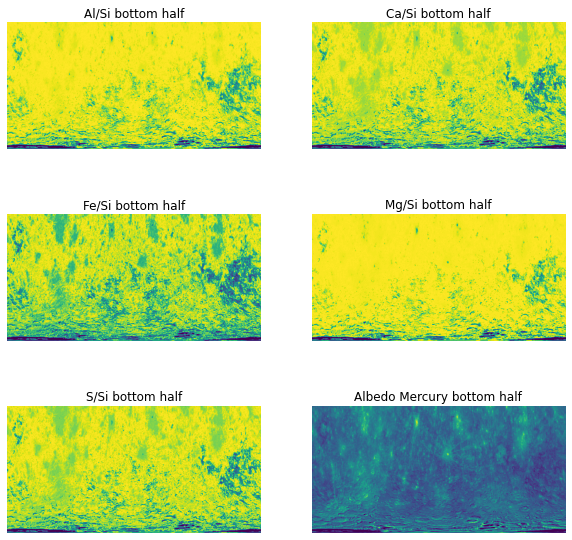

In [45]:
fig = plt.figure(figsize=(10,10))
rows = 3
columns = 2
  

Image1 = al_si_xgb_bottom
Image2 = ca_si_xgb_bottom
Image3 = fe_si_xgb_bottom
Image4 = mg_si_xgb_bottom
Image5 = s_si_xgb_bottom
Image6 = bottom
  

fig.add_subplot(rows, columns, 1)

plt.imshow(Image1)
plt.axis('off')
plt.title("Al/Si bottom half")
  

fig.add_subplot(rows, columns, 2)
  

plt.imshow(Image2)
plt.axis('off')
plt.title("Ca/Si bottom half")
  

fig.add_subplot(rows, columns, 3)
  

plt.imshow(Image3)
plt.axis('off')
plt.title("Fe/Si bottom half")
  

fig.add_subplot(rows, columns, 4)
  

plt.imshow(Image4)
plt.axis('off')
plt.title("Mg/Si bottom half")

fig.add_subplot(rows, columns, 5)
  

plt.imshow(Image5)
plt.axis('off')
plt.title("S/Si bottom half")

fig.add_subplot(rows, columns, 6)
  

plt.imshow(Image6)
plt.axis('off')
plt.title("Albedo Mercury bottom half")